# Entendimento do Negócio

## IBP - Índice Brasileiro de Privação
    O índice brasileiro de privação é baseado em Níveis socioeconômicos variam por região no Brasil. O IBP foi calculado estatisticamente a partir dos indicadores de renda, escolaridade e condições do domicílio da população de cada território. 

## Furto e Roubo dos municípios do estado de São Paulo
    Modalidades de Furto e Roubo no site da Secretaria de Segurança Pública do estado de São Paulo são:
        •ROUBO - OUTROS	
        •ROUBO DE VEÍCULO	
        •ROUBO A BANCO
        •ROUBO DE CARGA
        •FURTO - OUTROS
        •FURTO DE VEÍCULO

# Entendimento dos Dados

## DataSets

    • "BDI_Municipalities-Level_Short.csv" - temos os nomes do municípios, região e seus índices. 
    • "municipios.txt" - temos os nomes de todos os municípios em ordem.
    • "POPULAÇÃO SP 2021.xlsx" - população dos municípios do estado de São Paulo do ano de 2021.

# Preparação dos Dados

## Coleta de Dados de Furto e Roubo
    Nesta estapa, vou coletar os dados de Furto e Roubo no site da SSP/SP. Preciso utilizar a técnica de WebScrapping porque eles não fornecem o dataset necessário. Vou coletar os dados e somar todos para criar a somatória de furto e roubo. 

Módulos

In [3]:
# Ferramentas do Selenium para WebScraping
import selenium
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import Select

# Manipulação de Dados
import pandas as pd 

# Recurso necessário para a função lastnum_sdot()
import re

# Limpar terminal
import os

Funções

In [ ]:
# Função para limpar o terminal
def limpar():
     os.system('cls')
     
# Status de quanto falta para completar a coleta
def carregamento(contador):
    max = 645
    count = contador
    print(f"Está faltando {max - count} para completar {max} ({count}/{max})")

# Pegar o último número exato com ponto dentro de uma string 
def lastnum_sdot(text):
        texto = text
        padrao = r'\b\d+(\.\d+)?\b$'
        match = re.search(padrao, texto)
        if match:
            numero = match.group(0)
        else:
            print("Nenhum número encontrado.")
        numero_sem_ponto = numero.replace('.', '')
        return int(numero_sem_ponto)

Variáveis

In [ ]:
# Abrir o Google
navegador = webdriver.Chrome()

# Entrar no Site
navegador.get("https://www.ssp.sp.gov.br/estatistica/pesquisa.aspx")

# Seleciona Ocorrência Registrada por Mês
navegador.find_element(By.XPATH, '/html/body/div[3]/div/div[1]/form/div[3]/div[1]/div[5]/div[1]/div/a').send_keys(Keys.ENTER)

# Transformando arquivo .txt em .csv para construir tabela principal
main_frame = pd.read_csv("municipios.txt", delimiter='\t')

# Adicionando coluna para inserção de dados
main_frame["Furto e Roubo"] = 0

WebScrapping

In [ ]:
# Laço para repetir município por município
for c1 in range(0,645): # c1 vai ser usado como índice para associar os municípios
    limpar() # Usado para manter somente o print da função abaixo
    carregamento(c1) # Usado para dizer para o usuário quanto que falta para finalizar
    coletor = [] # Variável para manipulação e armazenagem dos dados filtrados

    select_box1 = Select(navegador.find_element(By.XPATH, '/html/body/div[3]/div/div[1]/form/div[3]/div[1]/div[3]/div[1]/div/select')) # Identificação da Caixa de Seleção Suspensa do município
    select_box1.select_by_index(c1 + 1) # Selecionar o município pelo índice

    table = navegador.find_element(By.CSS_SELECTOR, '[id="conteudo_repAnos_gridDados_2"]') # Identificação da Tabela Principal 2023
    
    # Seleção, coleta, filtragem e manipulação dos dados
    trs = table.find_elements(By.TAG_NAME, "tr") # Selecionar as linhas da tabela
    for td in trs: # Percorrer cada linha da tabela

        # Condicional para capturar somente os números necessários
        if "TOTAL DE ROUBO - OUTROS (1)" in td.text:
            coletor.append(lastnum_sdot(td.text))
        if "ROUBO DE VEÍCULO" in td.text:
            coletor.append(lastnum_sdot(td.text))
        if "FURTO - OUTROS"	in td.text:
            coletor.append(lastnum_sdot(td.text))
        if "FURTO DE VEÍCULO"	in td.text:
            coletor.append(lastnum_sdot(td.text))
        
    input_frame = sum(coletor) # Somar todos os dados coletados de um município
    main_frame.loc[c1, 'Furto e Roubo'] = input_frame # Armazenar na tabela principal, sendo c1 o índice na coluna "Furto e Roubo"

    # Resetar para o estado limpo da página
    select_box2 = Select(navegador.find_element(By.XPATH, '/html/body/div[3]/div/div[1]/form/div[3]/div[1]/div[2]/div[2]/div/select')) # Identificação da Caixa de Seleção Suspensa de Região
    select_box2.select_by_index(0) # Selecionar "Todos" na caixa

Exportação do dataset

In [ ]:
# Produto final
main_frame.to_excel('produto_pronto2021.xlsx', index=False)

## Desenvolvendo dataset principal 

Upload dos datasets externos

In [4]:
arquivo1 = pd.read_excel("POPULAÇÃO SP 2021.xlsx") # Dados com os MUNICÍPIOS e POPULAÇÃO
arquivo2 = pd.read_excel("Privat.xlsx") # Dados com o ÍNDICE DE PRIVAÇÃO
arquivo3 = pd.read_excel("produto_pronto2021.xlsx") # Dados com a quantidade de FURTO E ROUBO

Modelagem do DataFrame

In [5]:
maindf = pd.DataFrame()
maindf["municipios"] = arquivo1['Municípios'] # Nome dos Municípios
maindf["indice"] = arquivo2['q_measure_1f_12'] # Índice de Privação
maindf["pop"] = arquivo1['População'] # População dos Municípios
maindf["furto_e_roubo"] = arquivo3['Furto e Roubo'] # Furto e Roubo0
maindf["tc_hab"] = (((maindf["furto_e_roubo"]/maindf["pop"]) * (10**5)).round(0)).astype(int) # Taxa de Furto e Roubo por 100 mil habitantes

# Modelagem dos Dados

Módulos

In [6]:
# Manipulação de Ddos
from itertools import chain
import numpy as np

# Modelo de Regressão Linear, métricas e separação de treino e teste
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Funções

In [7]:
# Função para calcular MAPE
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

Regressão Linear

In [8]:
X = maindf[['indice']]  # Atributo
y = maindf['tc_hab']  # Variável alvo

# Separação de Teste e Treino
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ajustando o modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Previsão do Modelo
y_pred = model.predict(X_test)

# Avaliação

Módulos

In [9]:
# Visualização de Dados
import seaborn as sns
from matplotlib import pyplot as plt

Resposta do Modelo

In [10]:

# Resposta do modelo
print('MAE:', metrics.mean_absolute_error(y_test, y_pred)) # Mean Absolute Error
print('MSE:', metrics.mean_squared_error(y_test, y_pred)) # Mean Squared Error
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) # Root Mean Squared Error

# Proporção da Variabilidade da Variável 
print('Train R^2:', model.score(X_train, y_train)) 
print('Test R^2:', model.score(X_test, y_test))

# Fazendo as previsões
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculando MAPE(Mean Absolute Percentage Error)para os conjuntos de treinamento e teste
print('Train MAPE:', mean_absolute_percentage_error(y_train, y_train_pred))
print('Test MAPE:', mean_absolute_percentage_error(y_test, y_test_pred))

MAE: 367.626588593681
MSE: 859757.442330714
RMSE: 927.231061996261
Train R^2: 1.5421865766862553e-05
Test R^2: 0.0006371249253614986
Train MAPE: 52.99485599253701
Test MAPE: 66.22619140949233


Visualização da Regressão Linear

In [11]:
from scipy.stats import pearsonr
# Calculando o coeficiente de correlação de Pearson
corr, _ = pearsonr(list(chain.from_iterable(X.values)), y)

# Imprimindo o resultado
print("Coeficiente de correlação de Pearson:", corr)

Coeficiente de correlação de Pearson: -0.046070456810947596


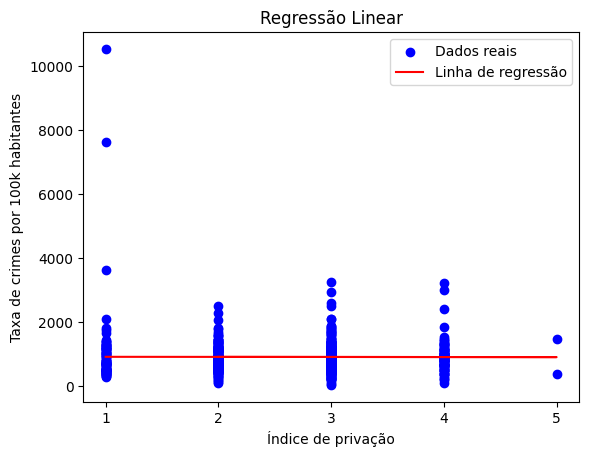

In [12]:
# Previsões para o dataset todo
y_pred_all = model.predict(X)

# Cria a figura e o eixo
fig, ax = plt.subplots()

# Plota os dados reais
ax.scatter(X, y, color='blue', label='Dados reais')

# Plota a linha de regressão
ax.plot(X.indice.values, y_pred_all, color='red', label='Linha de regressão')

# Define o título e as legendas
ax.set_title('Regressão Linear')
ax.set_xlabel('Índice de privação')
ax.set_ylabel('Taxa de crimes por 100k habitantes')
ax.set_xticks([1,2,3,4,5])

ax.legend()

# Mostra o gráfico
plt.show()

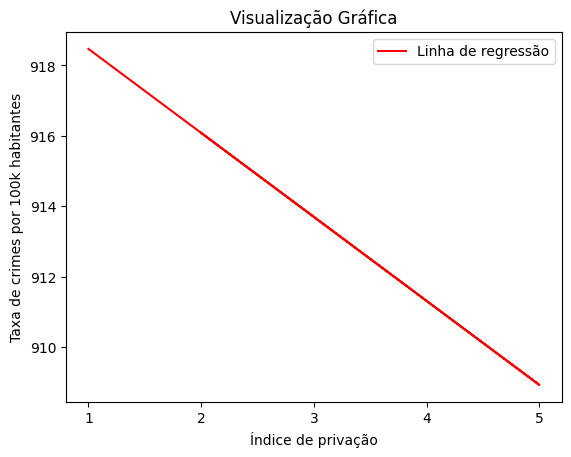

In [13]:
# Cria a figura e o eixo
fig, ax = plt.subplots()

# Plota a linha de regressão
ax.plot(X.indice.values, y_pred_all, color='red', label='Linha de regressão')

# Define o título e as legendas
ax.set_title('Visualização Gráfica')
ax.set_xlabel('Índice de privação')
ax.set_ylabel('Taxa de crimes por 100k habitantes')
ax.set_xticks([1,2,3,4,5])
ax.legend()

# Implantação / Finalização

## Conclusão.
    Em resumo, com base nos resultados, o modelo de regressão linear parece ter um desempenho insatisfatório, pois apresenta altos valores de erros (MAE, MSE, RMSE) e valores muito baixos de R^2. Além disso, o MAPE indica que as previsões do modelo têm um erro absoluto significativo em relação aos valores reais, tanto no conjunto de treinamento quanto no conjunto de teste.